In [1]:
from datetime import datetime

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import smtplib

In [3]:
weights = pd.read_csv("/home/dba/health/bodyweight.csv")

In [4]:
weights['Lost Last Night'] = weights['pmWeight'].shift(+1) - weights['amWeight']
weights['Gained Today'] = weights.pmWeight - weights.amWeight
#Numbers['PrepNumber'] = Numbers['Stock'].shift(-1) - (Numbers['Stock'] - Numbers['Sold Number'])
weights

,Date,amWeight,pmWeight,Lost Last Night,Gained Today
0,09/12/22,169.8,172.2,NaN,2.4
1,09/13/22,169.4,171.4,2.8,2.0
2,09/14/22,169.5,170.4,1.9,0.9
3,09/15/22,169.1,172.1,1.3,3.0
4,09/16/22,169.6,171.0,2.5,1.4
5,09/17/22,169.3,173.7,1.7,4.4
6,09/18/22,171.2,172.3,2.5,1.1
7,09/19/22,170.3,172.2,2.0,1.9
8,09/20/22,170.0,170.9,2.2,0.9
9,09/21/22,169.2,170.2,1.7,1.0


<AxesSubplot:xlabel='Date'>

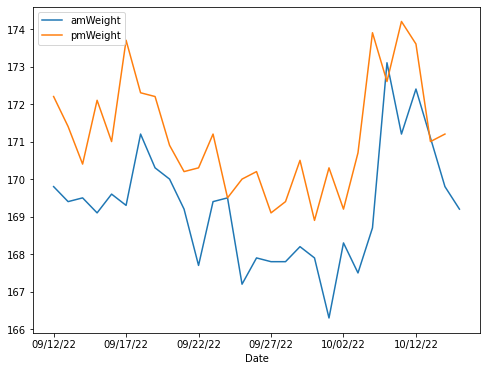

In [5]:
weights.plot(x="Date", y=["amWeight", "pmWeight"], kind="line", figsize=(8, 6))

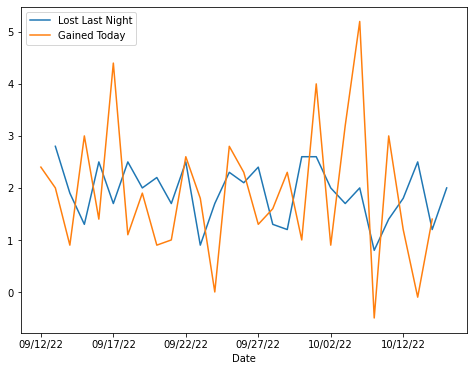

In [6]:
weights.plot(x="Date", y=["Lost Last Night", "Gained Today"], kind="line", figsize=(8, 6))
blood = pd.read_csv("/home/dba/health/bp.csv")

<AxesSubplot:xlabel='Date'>

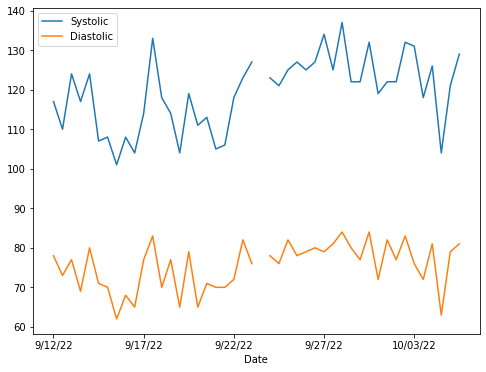

In [7]:
blood.plot(x="Date", y=["Systolic", "Diastolic"], kind="line", figsize=(8, 6))

In [8]:
blood.describe()

,Systolic,Diastolic,Pulse
count,45.000000,45.000000,45.000000
mean,119.311111,75.422222,71.000000
std,9.280532,6.005637,5.423015
min,101.000000,62.000000,64.000000
25%,113.000000,71.000000,67.000000
50%,121.000000,77.000000,71.000000
75%,125.000000,80.000000,74.000000
max,137.000000,84.000000,84.000000


In [9]:
blood

,Date,Systolic,Diastolic,Pulse
0,9/12/22,117.0,78.0,73.0
1,9/12/22,110.0,73.0,70.0
2,9/13/22,124.0,77.0,77.0
3,9/13/22,117.0,69.0,73.0
4,9/14/22,124.0,80.0,75.0
5,9/14/22,107.0,71.0,82.0
6,9/15/22,108.0,70.0,66.0
7,9/15/22,101.0,62.0,73.0
8,9/16/22,108.0,68.0,67.0
9,9/16/22,104.0,65.0,66.0


In [10]:
weights.describe()

,amWeight,pmWeight,Lost Last Night,Gained Today
count,26.000000,26.000000,25.000000,26.000000
mean,169.165385,171.153846,1.916000,1.988462
std,1.587184,1.557750,0.550515,1.314025
min,166.300000,168.900000,0.800000,-0.500000
25%,167.900000,170.200000,1.700000,1.025000
50%,169.250000,170.800000,2.000000,1.850000
75%,169.750000,172.200000,2.400000,2.750000
max,173.100000,174.200000,2.800000,5.200000
